# Bowtie 2

## Imports

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Loading data

In [50]:
data = pd.read_csv("bow-tie.csv")

In [51]:
data.head()

,Unnamed: 0,x1,x2,t,x3
0,0,-20.00000,-22.837923,0.0,456.758456
1,1,-19.95996,-30.545483,0.0,609.686611
2,2,-19.91992,-23.318671,0.0,464.506069
3,3,-19.87988,-22.799704,0.0,453.255376
4,4,-19.83984,-31.876668,0.0,632.427995


In [52]:
data.drop(["Unnamed: 0", "x3"], axis=1, inplace=True)

In [53]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,-1.207923e-16,11.561449,-20.000000,-10.000000,0.000000,10.000000,20.000000
x2,2000.0,-3.858392e-01,20.587391,-51.902993,-15.819489,0.458157,16.014055,49.869455
t,2000.0,5.000000e-01,0.500125,0.000000,0.000000,0.500000,1.000000,1.000000


In [54]:
data.describe()

,x1,x2,t
count,2.000000e+03,2000.000000,2000.000000
mean,-1.207923e-16,-0.385839,0.500000
std,1.156145e+01,20.587391,0.500125
min,-2.000000e+01,-51.902993,0.000000
25%,-1.000000e+01,-15.819489,0.000000
50%,0.000000e+00,0.458157,0.500000
75%,1.000000e+01,16.014055,1.000000
max,2.000000e+01,49.869455,1.000000


In [56]:
data.sample(10)

,x1,x2,t
613,4.544545,-0.886715,0.0
521,0.860861,0.814006,0.0
478,-0.860861,4.924726,0.0
832,13.313313,26.501465,0.0
765,10.630631,17.217125,0.0
1234,-10.630631,18.747816,1.0
675,7.027027,13.008721,0.0
759,10.390390,11.236948,0.0
834,13.393393,27.921882,0.0
1218,-11.271271,24.129998,1.0


## Exploratory Data Analysis

In [57]:
x1 = data['x1']
x2 = data['x2']
t = data['t']

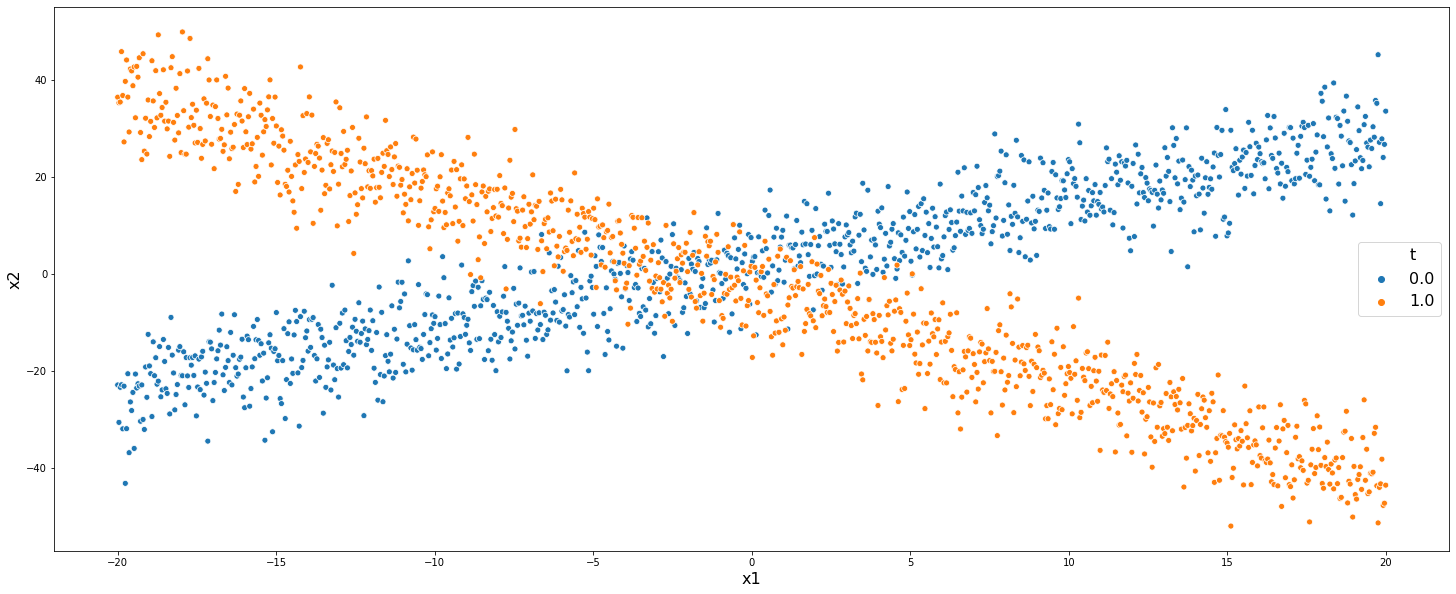

In [62]:
sns.scatterplot(x1, x2, hue=t);

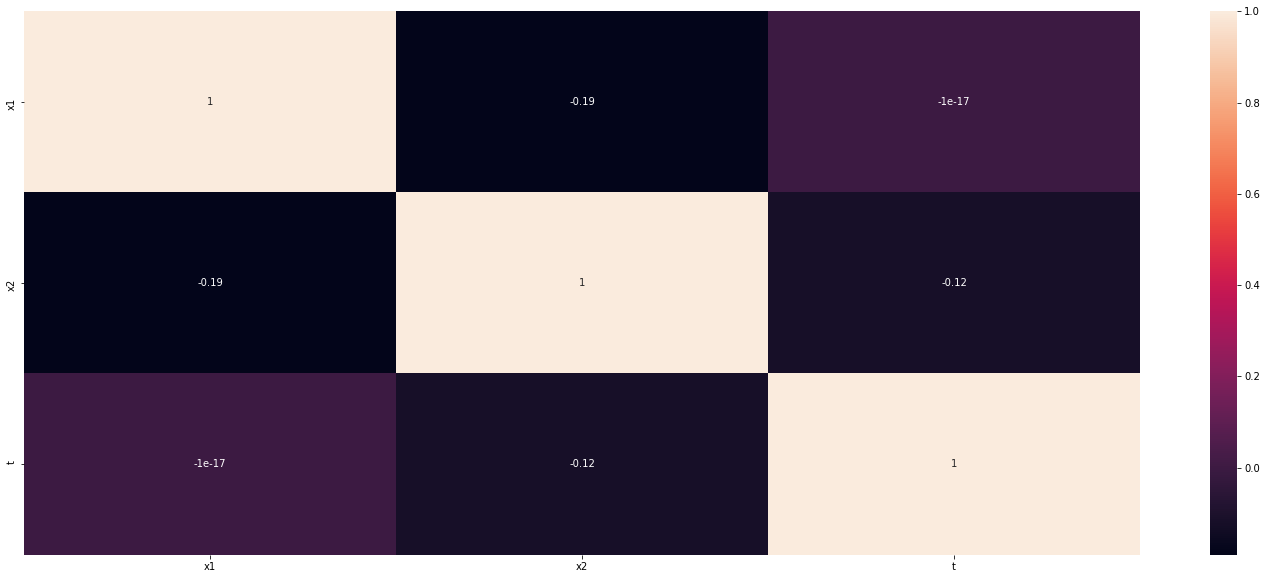

In [63]:
sns.heatmap(data.corr(), annot=True);

(array([ 29.,  84., 143., 168., 286., 792., 297., 148.,  48.,   5.]),
 array([-1012.75124214,  -822.20517912,  -631.65911609,  -441.11305306,
         -250.56699003,   -60.02092701,   130.52513602,   321.07119905,
          511.61726208,   702.16332511,   892.70938813]),
 <a list of 10 Patch objects>)

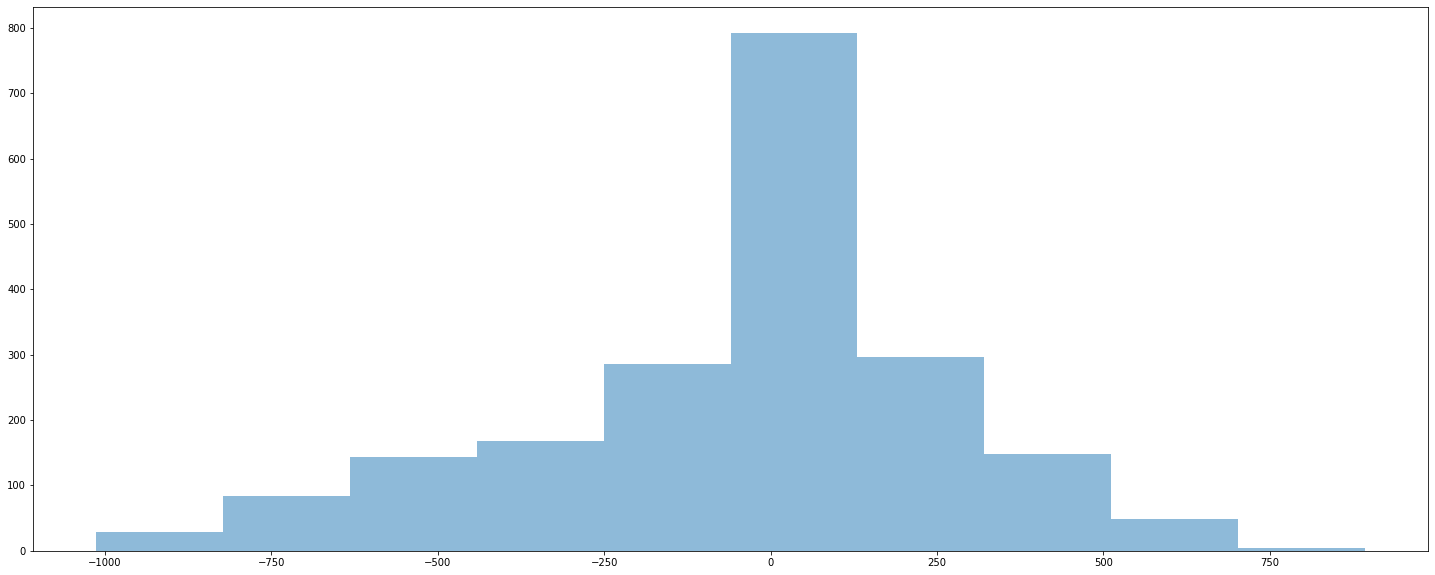

In [86]:
plt.hist(data['x3'], alpha=0.5)

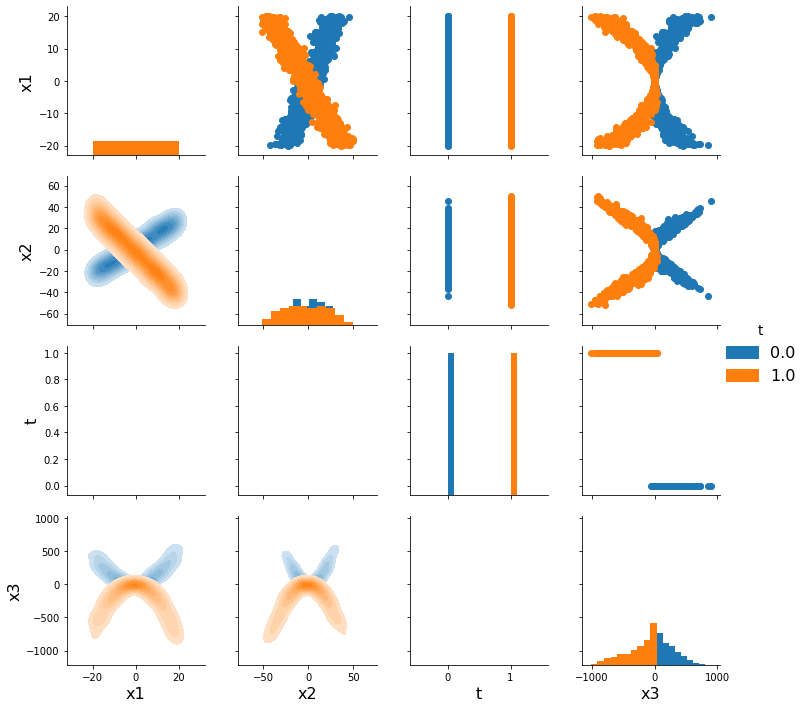

In [81]:
g = sns.PairGrid(data, hue='t')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, shade = True, shade_lowest = False)
g = g.map_diag(plt.hist)
g = g.add_legend()

When $t=0$, we see that $x1$ and $x2$ have a positive correlation. And when $t=1$, we see that $x1$ and $x2$ have a negative correlation.

In [73]:
data['x3'] = (data['x1']*data['x2'])

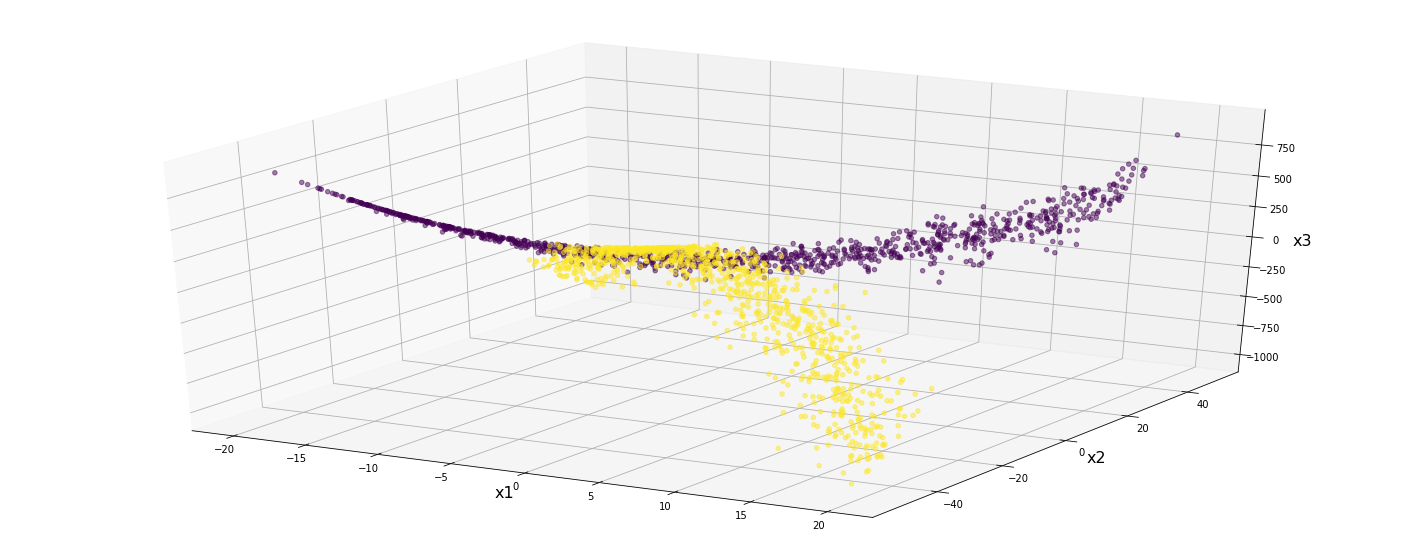

In [74]:
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x1'], data['x2'], data['x3'], c=t, alpha=0.5);
ax.set_xlabel('x1');
ax.set_ylabel('x2');
ax.set_zlabel('x3');
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

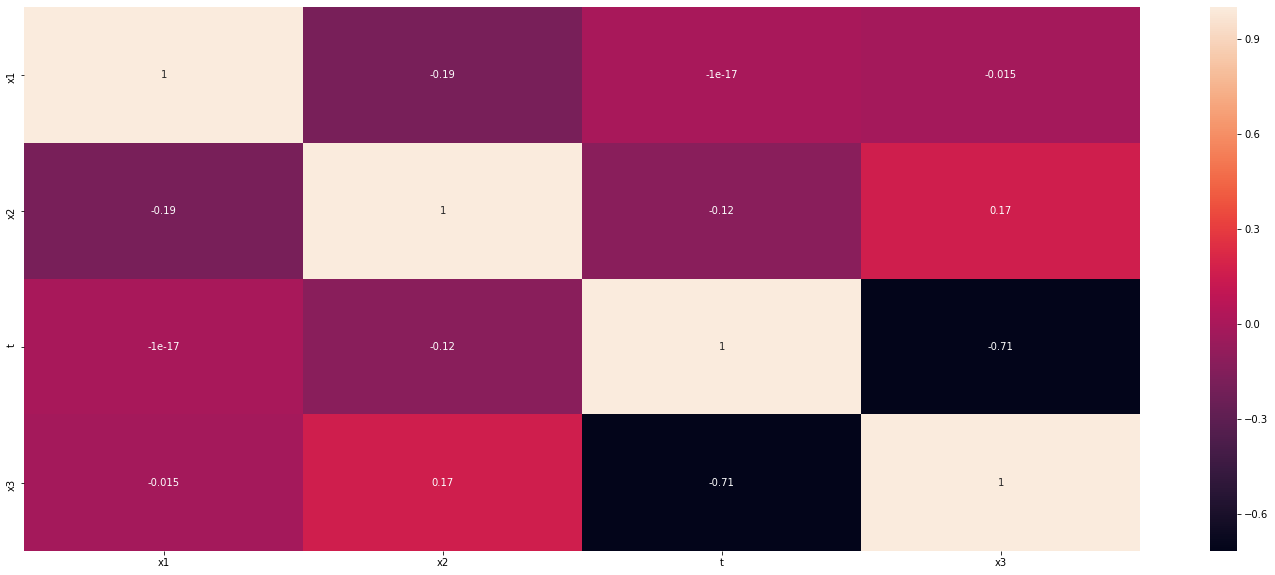

In [67]:
sns.heatmap(data.corr(), annot=True)

In [44]:
# sns.scatterplot(data['x3'])